In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##Data Preprocessing

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

####Descriptive Statistics

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


##Data Visualizations

###Univariate Analysis

<ipython-input-28-2b8341ef89cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

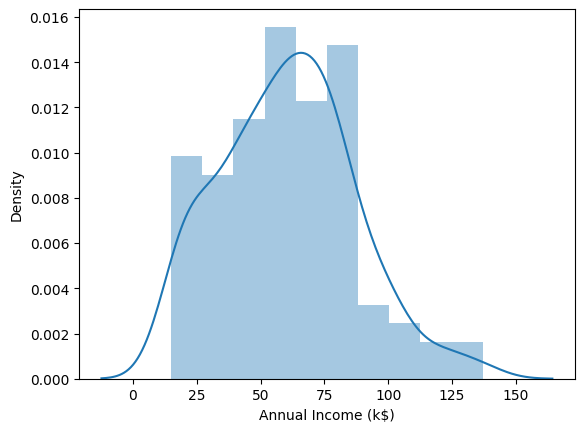

In [ ]:
sns.distplot(df["Annual Income (k$)"])

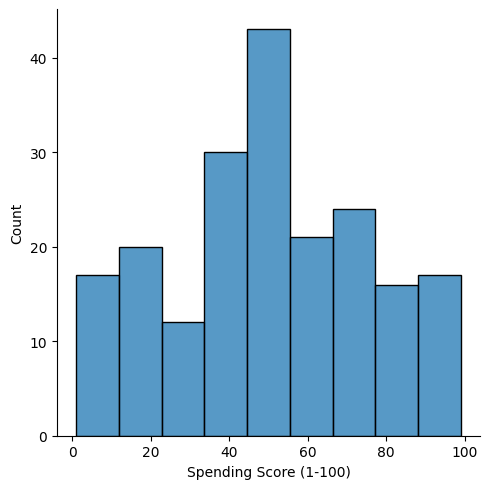

In [ ]:
sns.displot(df["Spending Score (1-100)"])

###Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

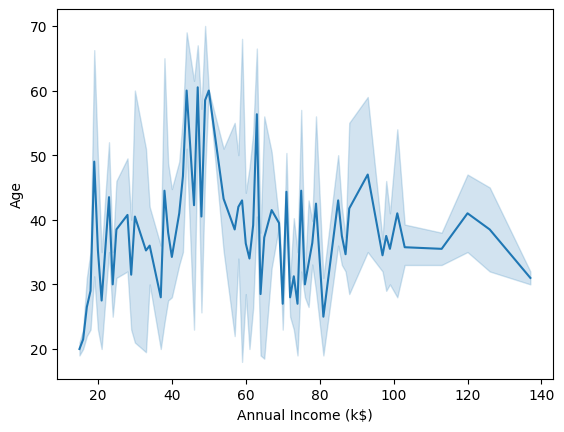

In [ ]:
sns.lineplot(x = df["Annual Income (k$)"],y=df["Age"])

<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

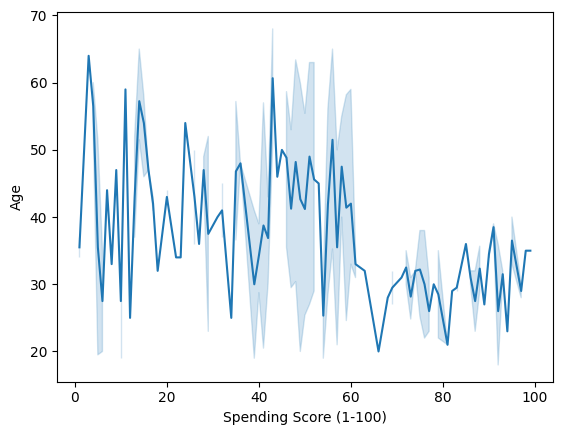

In [ ]:
sns.lineplot(x = df["Spending Score (1-100)"],y=df["Age"])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

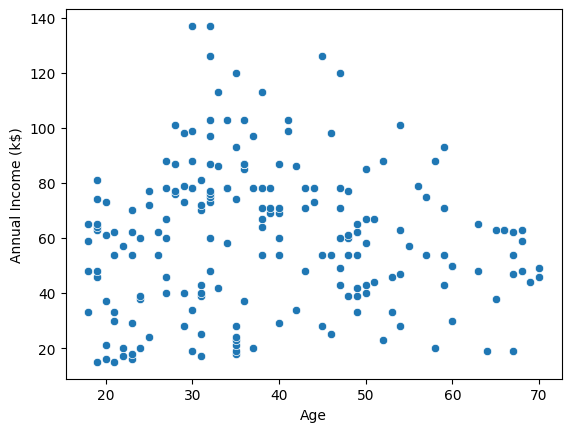

In [ ]:
sns.scatterplot(x=df["Age"],y=df["Annual Income (k$)"])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

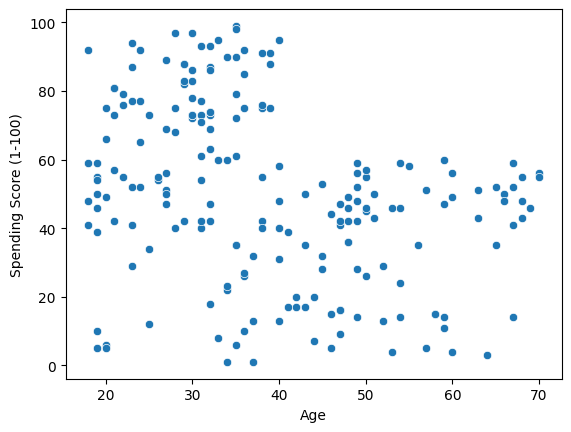

In [ ]:
sns.scatterplot(x=df["Age"],y=df["Spending Score (1-100)"])

###Multivariate Analysis

In [ ]:
#removing the CustomerID	column
df=df.drop(columns=["CustomerID"],axis=1)


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<ipython-input-36-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

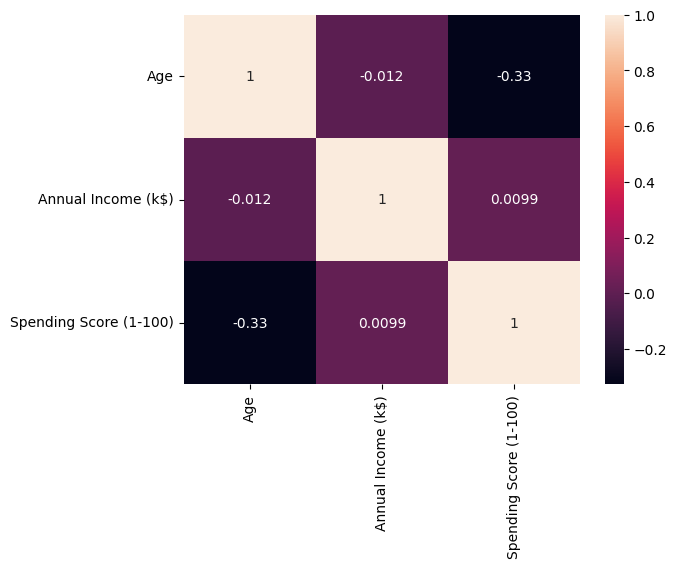

In [ ]:
sns.heatmap(df.corr(),annot=True)

##Detecting Outliers

<Axes: >

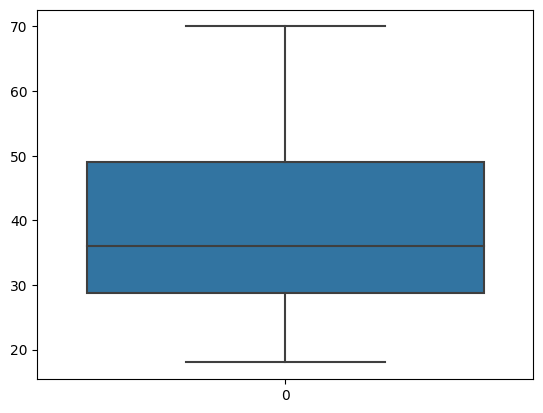

In [ ]:
#outliers
sns.boxplot(df["Age"])

<Axes: >

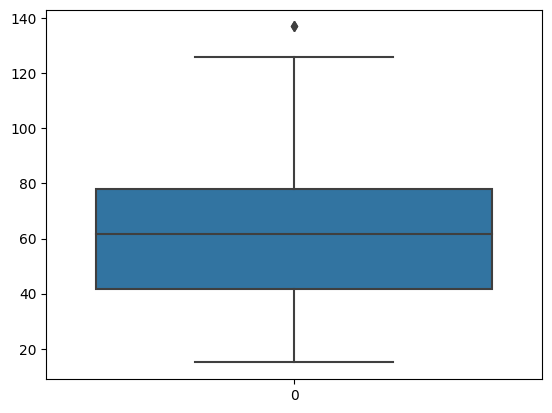

In [ ]:
sns.boxplot(df["Annual Income (k$)"])

<Axes: >

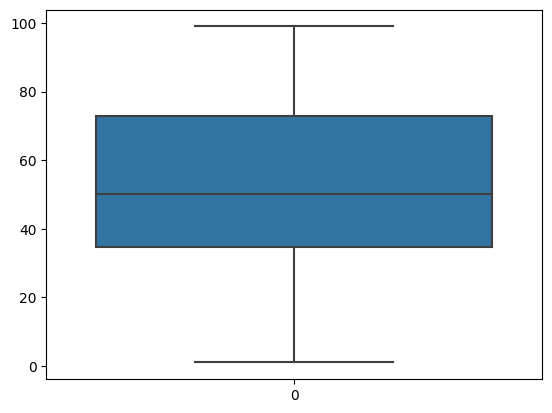

In [ ]:
sns.boxplot(df["Spending Score (1-100)"])

In [ ]:
df.shape

(200, 4)

In [ ]:
'''
1. outliers are only present in the Anual Income Column
2. As the data set size is small i.e., (200,4) we prefer to remove the outliers by
replacing it with the median
'''

'\n1. outliers are only present in the Anual Income Column\n2. As the data set size is small i.e., (200,4) we prefer to remove the outliers by \nreplacing it with the median \n'

####outlier Removal by replacing with median

In [ ]:
q1 = df["Annual Income (k$)"].quantile(0.25) #Q1
q3 = df["Annual Income (k$)"].quantile(0.75) #Q3

In [ ]:
IQR = q3-q1
IQR

36.5

In [ ]:
upper_limit = q3+1.5*IQR
lower_limit= q1-1.5*IQR

In [ ]:
print(upper_limit)
print(lower_limit)

132.75
-13.25


In [ ]:
df["Annual Income (k$)"].median()

61.5

In [ ]:
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"]>upper_limit,
                                    df["Annual Income (k$)"].median(),df["Annual Income (k$)"])

<Axes: >

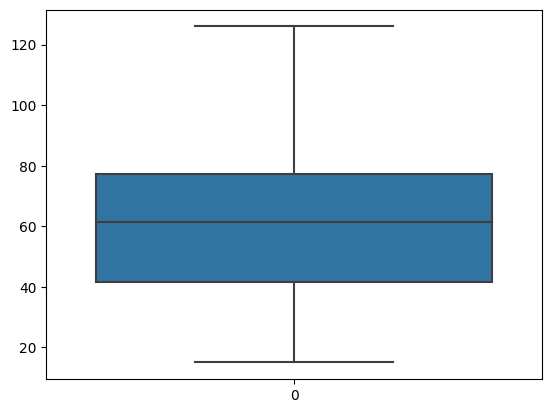

In [ ]:
sns.boxplot(df["Annual Income (k$)"])

##Encoding

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15.0,39
1,Male,21,15.0,81
2,Female,20,16.0,6
3,Female,23,16.0,77
4,Female,31,17.0,40


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
#Encode gender column
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


###Scaling

In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,59.805000,50.200000
std,0.497633,13.969007,25.110699,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.250000,50.000000
75%,1.000000,49.000000,77.250000,73.000000
max,1.000000,70.000000,126.000000,99.000000


In [ ]:
'''
There is no need to scale the data as the values are in the acceptable range
in each column.
'''

##Model Building

In [ ]:
from sklearn import cluster

In [ ]:
error=[]
for i in range(1,21):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
error

[297063.67500000005,
 201152.1081841432,
 139326.23321730684,
 100349.31619915173,
 71419.31019600156,
 54455.93879921248,
 48690.46594333272,
 43129.160533628616,
 39615.369155565975,
 35843.49956778214,
 33278.733199625574,
 30455.882469632095,
 28503.819733720222,
 26989.594244183107,
 25382.447612001288,
 23483.713404528484,
 22925.141693722944,
 22138.91554621848,
 21074.34240620491,
 19520.810760971057]

In [ ]:
error.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

Text(0, 0.5, 'error')

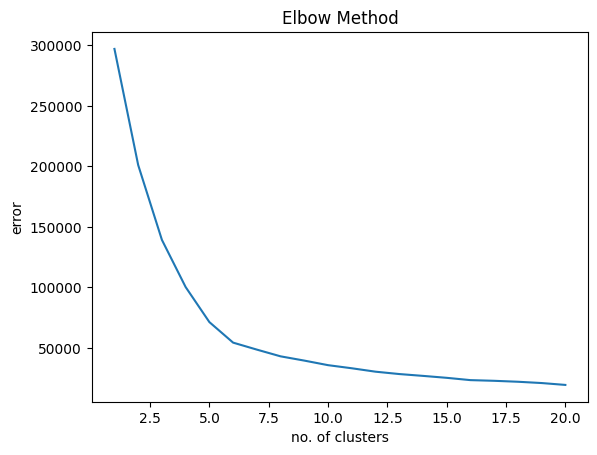

In [ ]:
plt.plot(range(1,21),error)
plt.title("Elbow Method")
plt.xlabel("no. of clusters")
plt.ylabel("error")

In [ ]:
#As the curve has the large bend at 6th index i.e., no of cluster=6
km_model=cluster.KMeans(n_clusters=6,init='k-means++',random_state=0)

In [ ]:
km_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [ ]:
km_pred=km_model.predict(df)

In [ ]:
km_pred

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 2,
       5, 4, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [ ]:
#test model with random observation
km_model.predict([[1,22,38,77]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)